<a href="https://colab.research.google.com/github/rich-hyun/Kuggle_9th_team_/blob/main/Kuggle_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # 넘파이
import pandas as pd # 판다스
import os # (기본 내장 라이브러리) os
import matplotlib.pyplot as plt # 맷플롯립
import seaborn as sns # 씨본

In [2]:
# 데이터 로딩
df = pd.read_csv('https://raw.githubusercontent.com/rich-hyun/Kuggle_9th_team_/main/reviews_data.csv')

# 데이터프레임의 첫 번째 행과 처음 다섯 열을 출력
print(df.iloc[0, :5])

name                                                    Helen
location                                    Wichita Falls, TX
Date                                  Reviewed Sept. 13, 2023
Rating                                                    5.0
Review      Amber and LaDonna at the Starbucks on Southwes...
Name: 0, dtype: object


In [3]:
df = df.iloc[:,:5]

In [4]:
df

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I?셫 on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...
841,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...
842,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text
843,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL..."
844,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text


In [5]:
df.Review

0      Amber and LaDonna at the Starbucks on Southwes...
1      ** at the Starbucks by the fire station on 436...
2      I just wanted to go out of my way to recognize...
3      Me and my friend were at Starbucks and my card...
4      I?셫 on this kick of drinking 5 cups of warm wa...
                             ...                        
841    I ordered two venti frappacino's without whipp...
842                                       No Review Text
843    DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...
844                                       No Review Text
845                                       No Review Text
Name: Review, Length: 846, dtype: object

In [6]:
df_len = df.Review.apply(len)
df_len.head()

0    331
1    555
2    351
3    441
4    405
Name: Review, dtype: int64

count     846.000000
mean      470.159574
std       243.720699
min        14.000000
25%       271.250000
50%       457.000000
75%       652.000000
max      1161.000000
Name: Review, dtype: float64


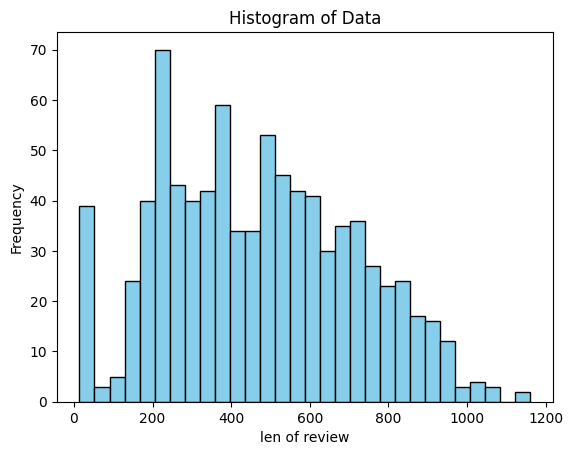

In [7]:
print(df_len.describe())
plt.hist(df_len, bins=30, color='skyblue', edgecolor='black')  # 데이터와 bin 개수, 색상, 테두리색상 설정
plt.xlabel('len of review')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.title('Histogram of Data')  # 그래프 제목 설정
plt.show()  # 그래프 출력


{'whiskers': [<matplotlib.lines.Line2D at 0x787c6ecbfa60>,
 'caps': [<matplotlib.lines.Line2D at 0x787c6ecbffa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x787c6ecbf7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x787c6ecf8520>],
 'fliers': [<matplotlib.lines.Line2D at 0x787c6ecf8a60>],
 'means': [<matplotlib.lines.Line2D at 0x787c6ecf87c0>]}

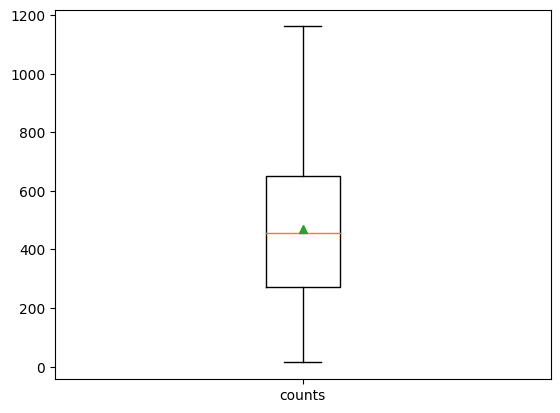

In [8]:
plt.boxplot(df_len,
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

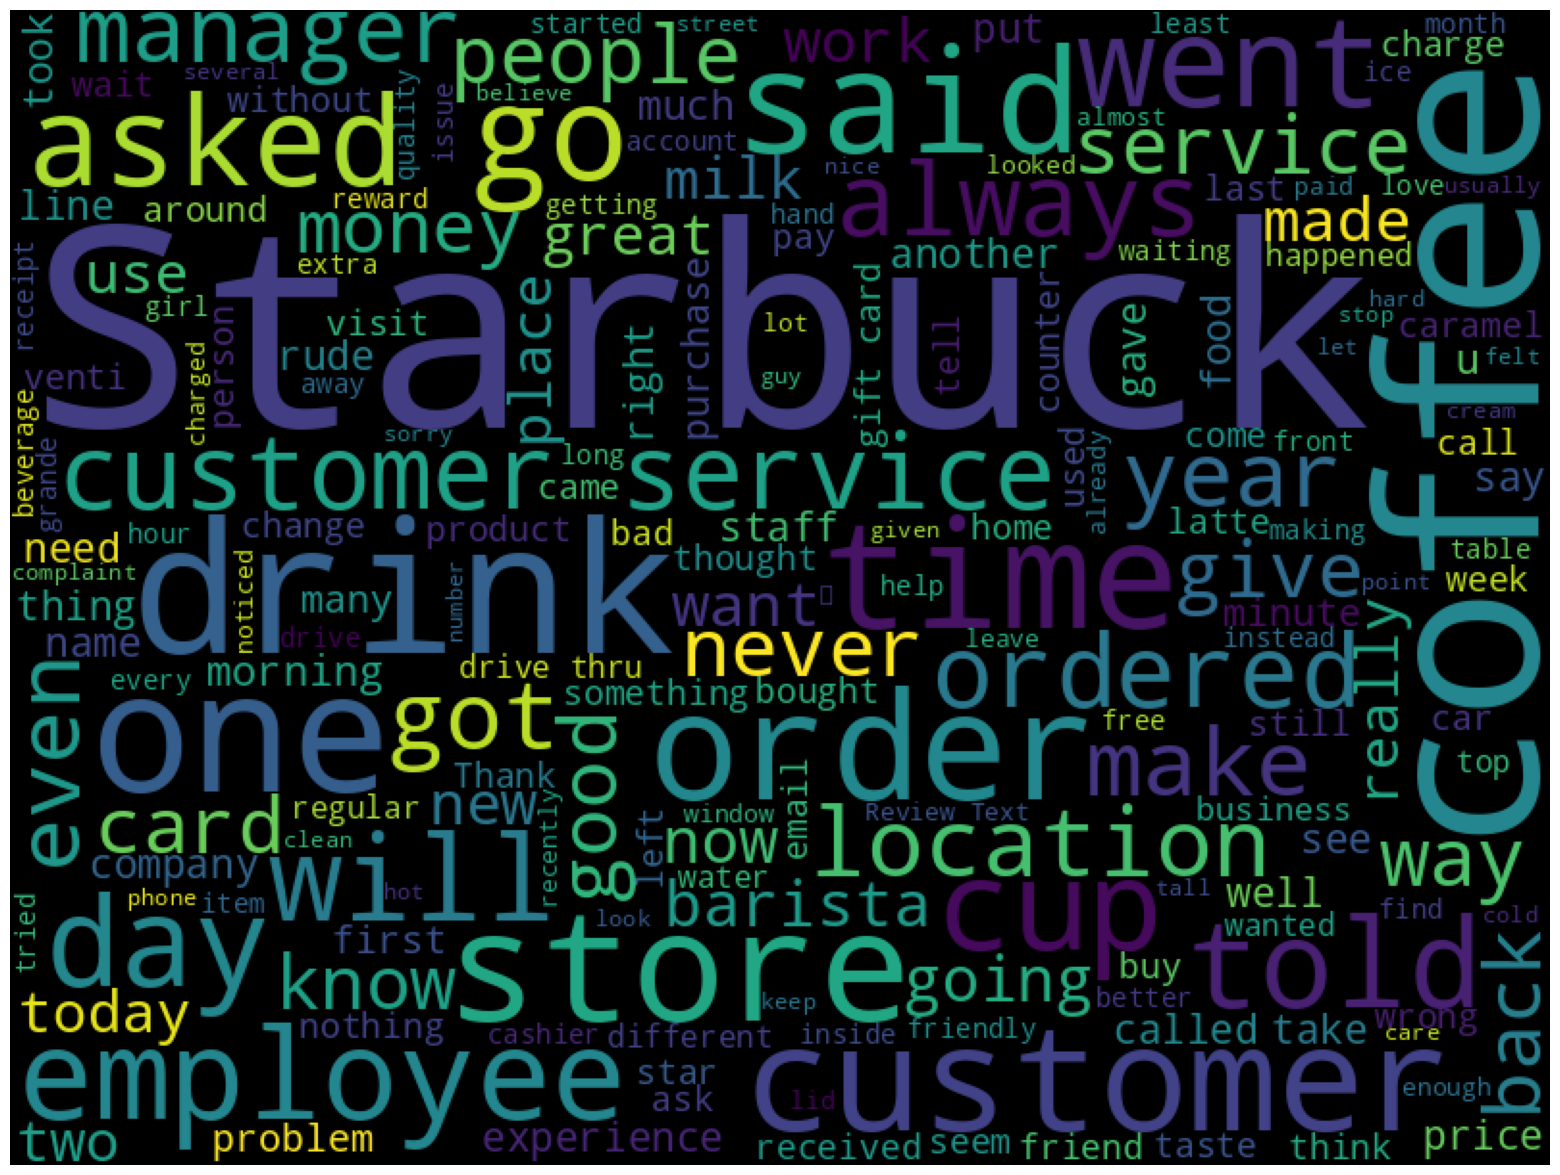

In [9]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(df['Review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

1.0    448
2.0     98
5.0     83
4.0     39
3.0     33
Name: Rating, dtype: int64


(array([448.,   0.,  98.,   0.,   0.,  33.,   0.,  39.,   0.,  83.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

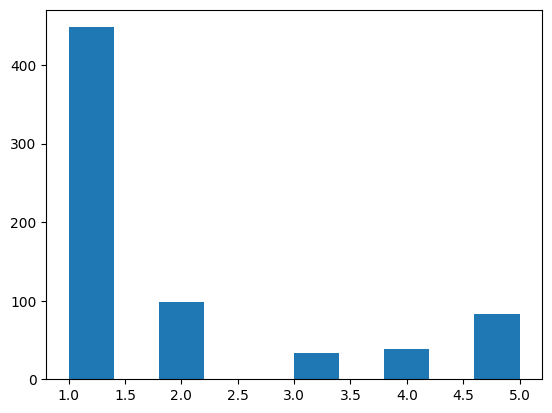

In [10]:
print(df['Rating'].value_counts())
plt.hist(df['Rating'])
#1점 데이터가 많았

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
docs =  df['Review']
bag = count.fit_transform(docs).toarray()

In [12]:
docs

0      Amber and LaDonna at the Starbucks on Southwes...
1      ** at the Starbucks by the fire station on 436...
2      I just wanted to go out of my way to recognize...
3      Me and my friend were at Starbucks and my card...
4      I?셫 on this kick of drinking 5 cups of warm wa...
                             ...                        
841    I ordered two venti frappacino's without whipp...
842                                       No Review Text
843    DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...
844                                       No Review Text
845                                       No Review Text
Name: Review, Length: 846, dtype: object

In [13]:
pd.DataFrame(bag)

,0,1,2,3,4,5,6,7,8,9,...,5711,5712,5713,5714,5715,5716,5717,5718,5719,5720
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True,
                         norm='l2',
                         smooth_idf=True)

In [15]:
np.set_printoptions(precision=2)

In [16]:
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
df['name'].value_counts()

Linda        13
John         10
David         9
Michael       9
Kelly         8
             ..
Bertha        1
Jack          1
Lukas         1
Kirita        1
Christian     1
Name: name, Length: 603, dtype: int64

In [22]:
from plotly.express import bar
bar(data_frame=df['name'].value_counts().to_frame())

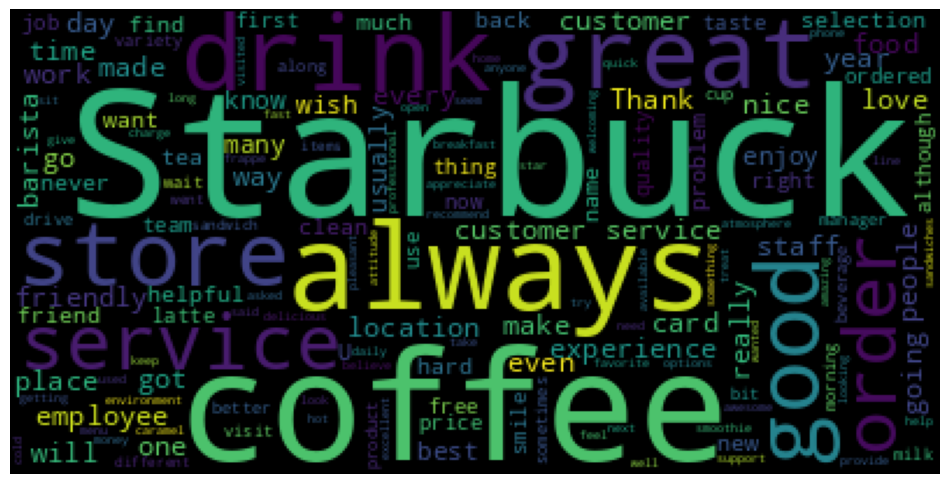

In [19]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from matplotlib.pyplot import subplots
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud(random_state=2023).generate(' '.join(df[df['Rating'] > 3]['Review'].values.tolist())))

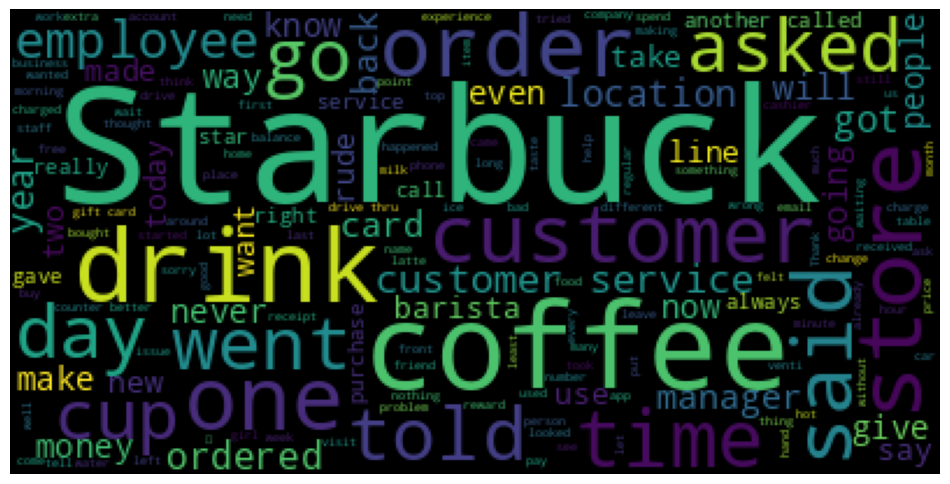

In [20]:
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud(random_state=2023).generate(' '.join(df[df['Rating'] ==1]['Review'].values.tolist())))

In [24]:
!pip install nltk

In [26]:
import nltk